In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import statistics as stats

In [ ]:
df=pd.read_csv('Customer Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
def convert(values):
  if values == 0:
    return 'No'
  else:
    return 'Yes'
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


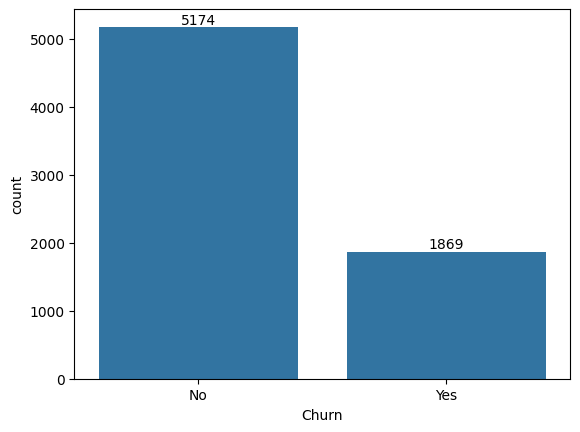

In [ ]:
#count plot
a=sb.countplot(x='Churn',data=df)
a.bar_label(a.containers[0])
plt.show()

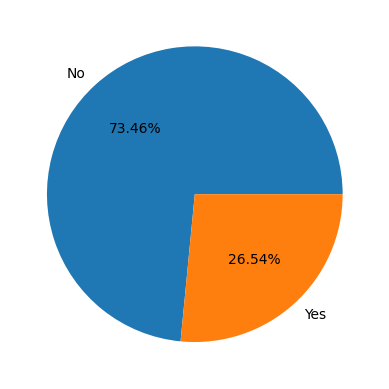

In [ ]:
#pie chart
gb=df.groupby('Churn').agg({"Churn":"count"})
gb
plt.pie(gb['Churn'], labels= gb.index, autopct="%1.2f%%")
plt.show()


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

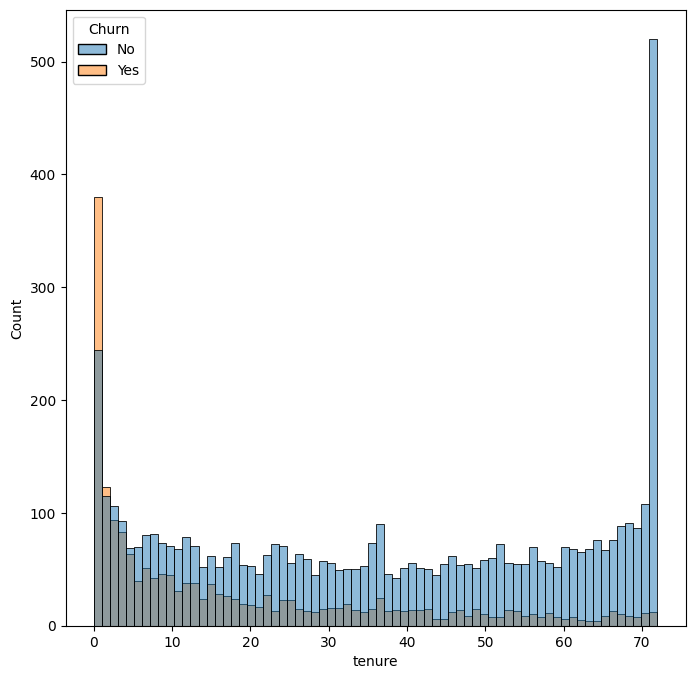

In [ ]:
#Churn on behalf of Tenure and Payment Method
plt.figure(figsize=(8,8))
a=sb.histplot(x='tenure',bins=70,hue='Churn',data=df)

plt.show()


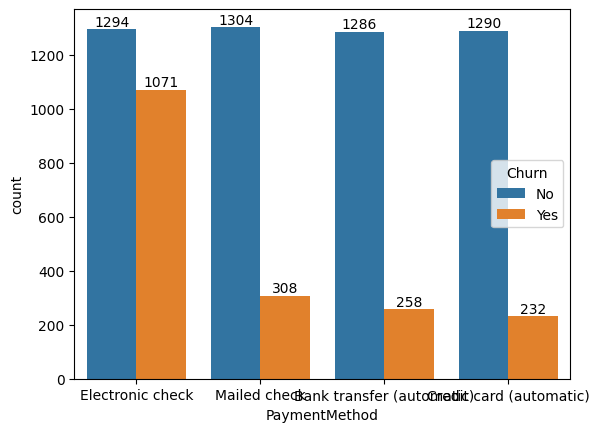

In [ ]:
a=sb.countplot(x='PaymentMethod',data=df,hue='Churn')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.show()

In [ ]:
df.shape

(7043, 21)

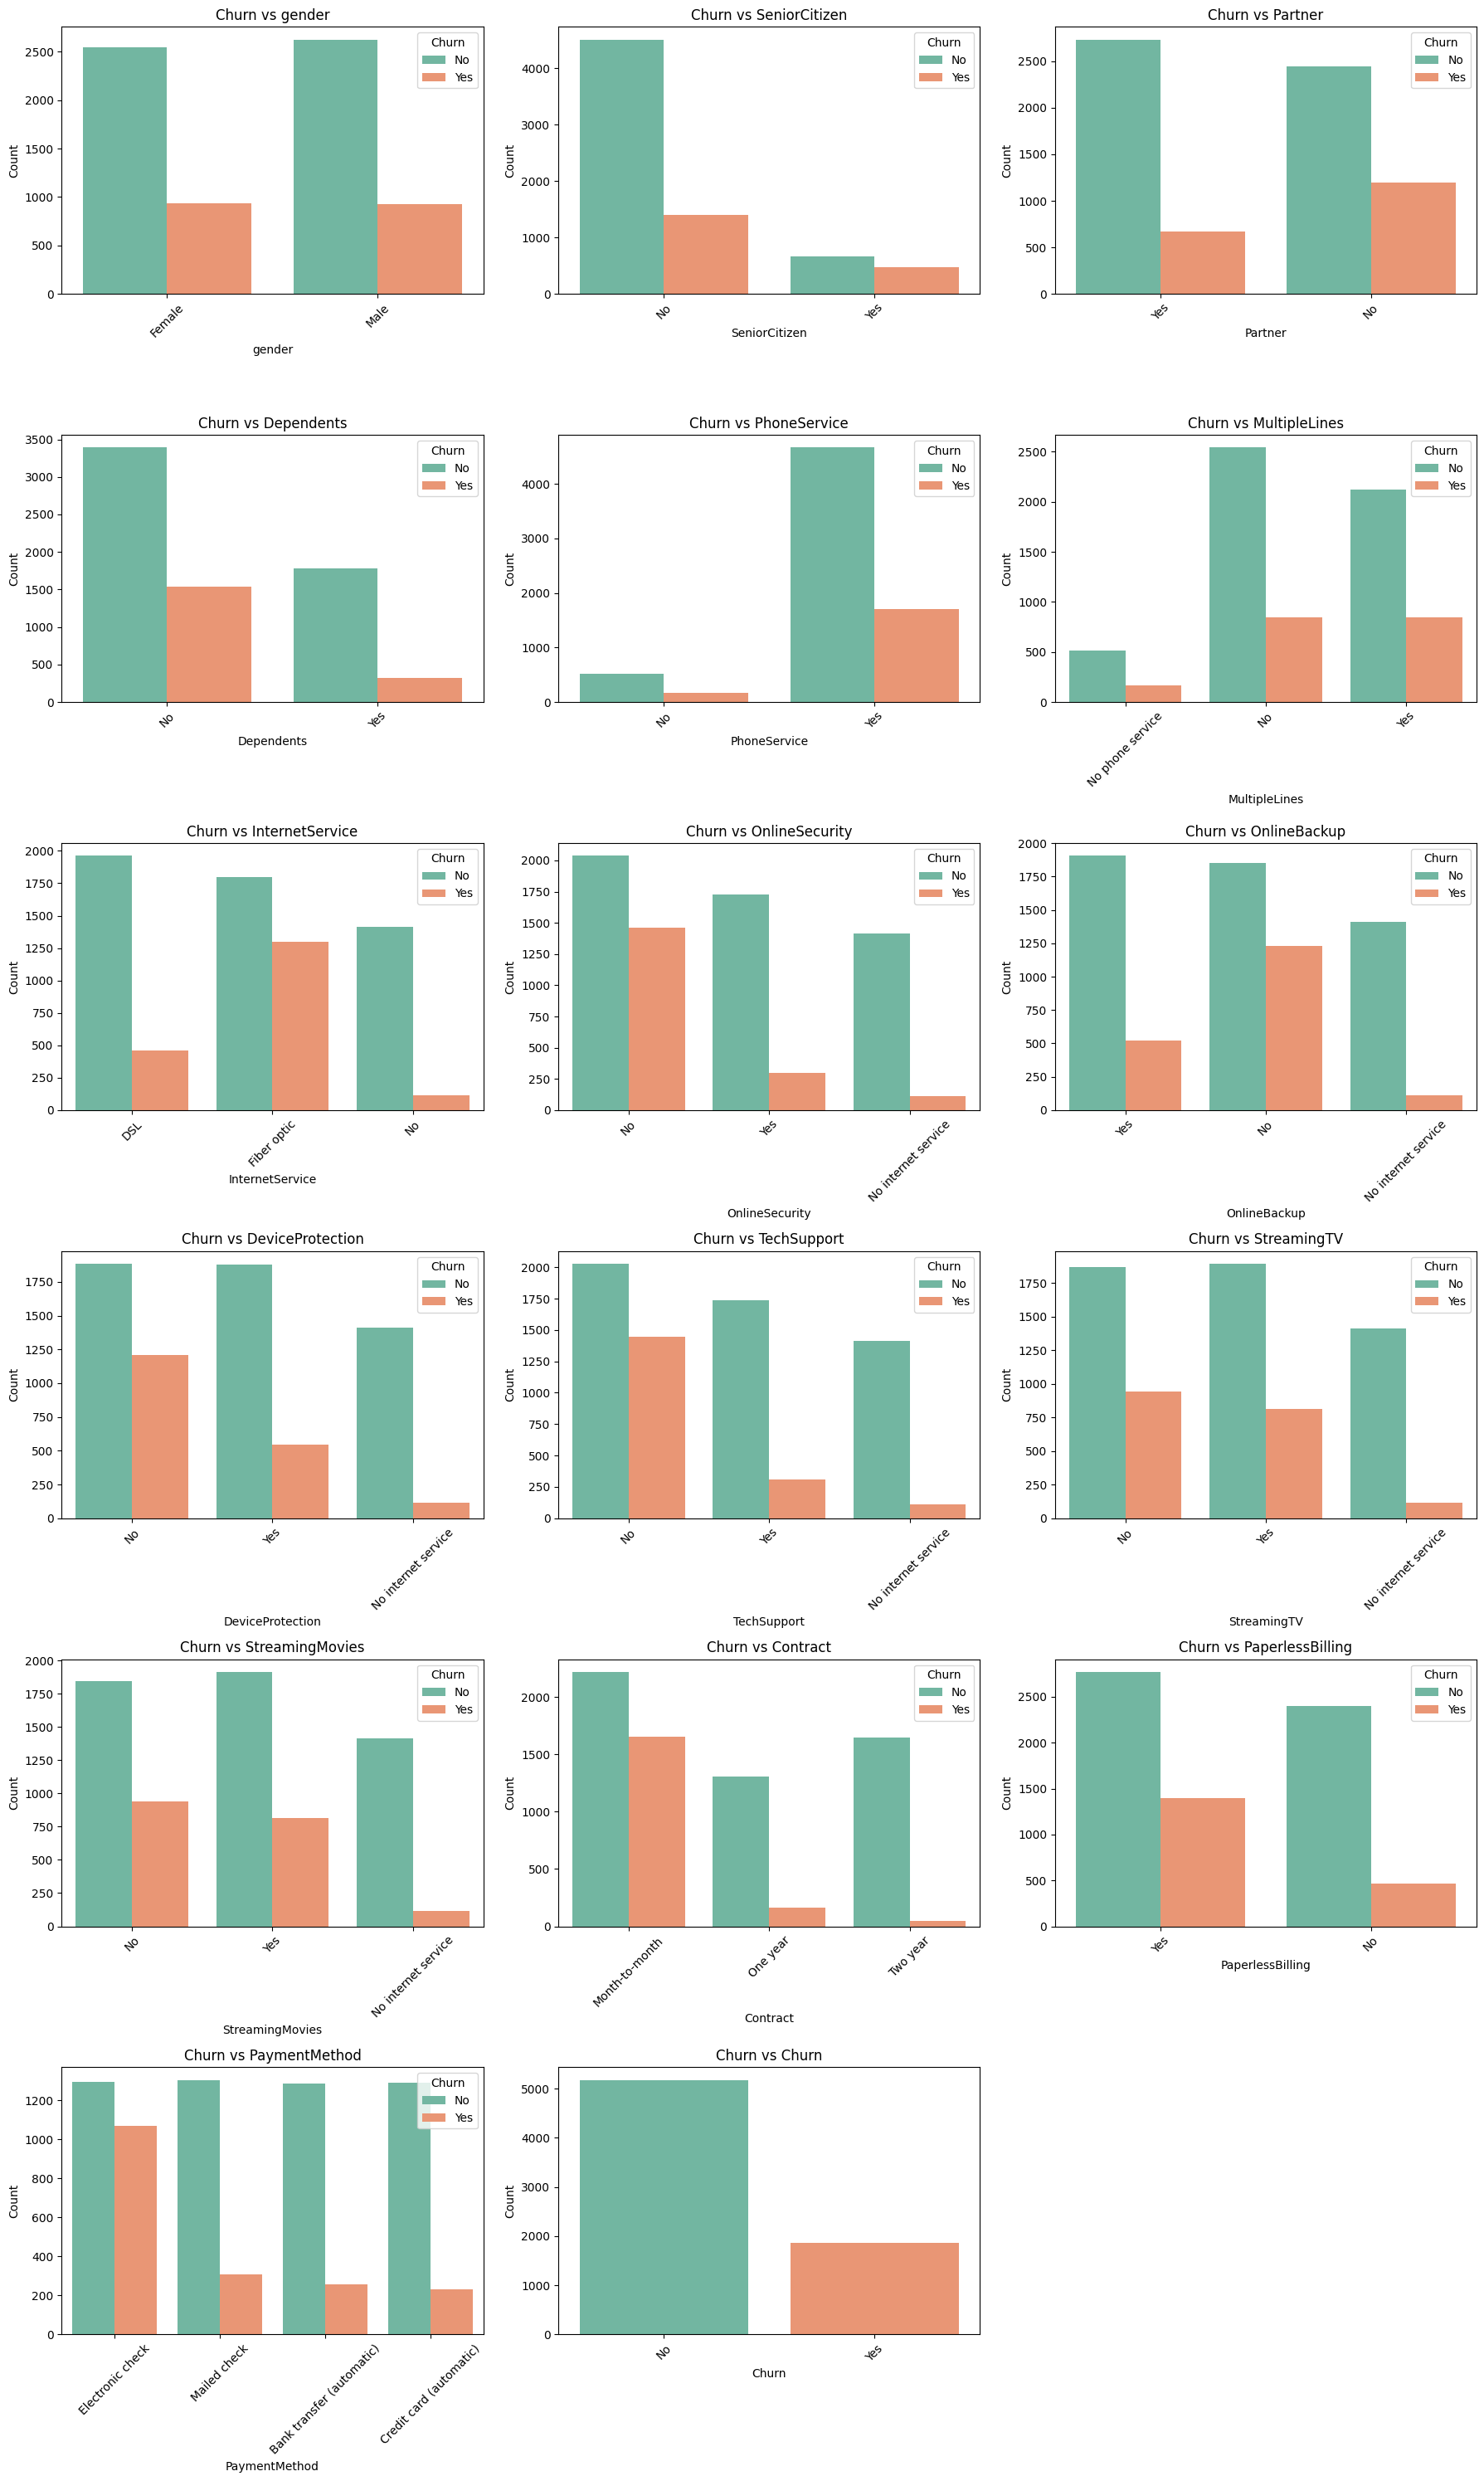

In [ ]:
category_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
n_cols=3
n_rows = (len(category_cols) - 1) // n_cols + 1
plt.figure(figsize=(18,n_rows*5))
for i, col in enumerate(category_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sb.countplot(x=col, data=df, hue='Churn', palette='Set2')
    plt.title(f'Churn vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


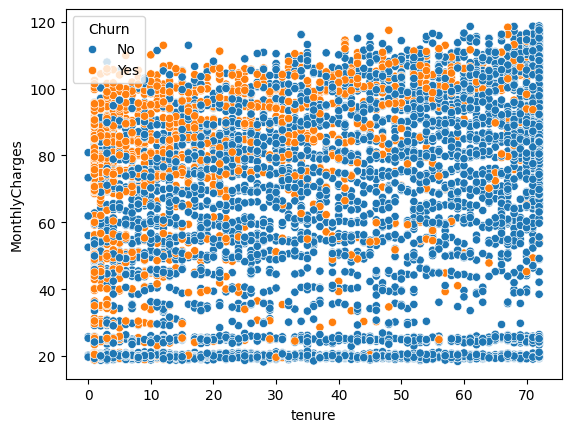

In [ ]:
sb.scatterplot(x='tenure',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

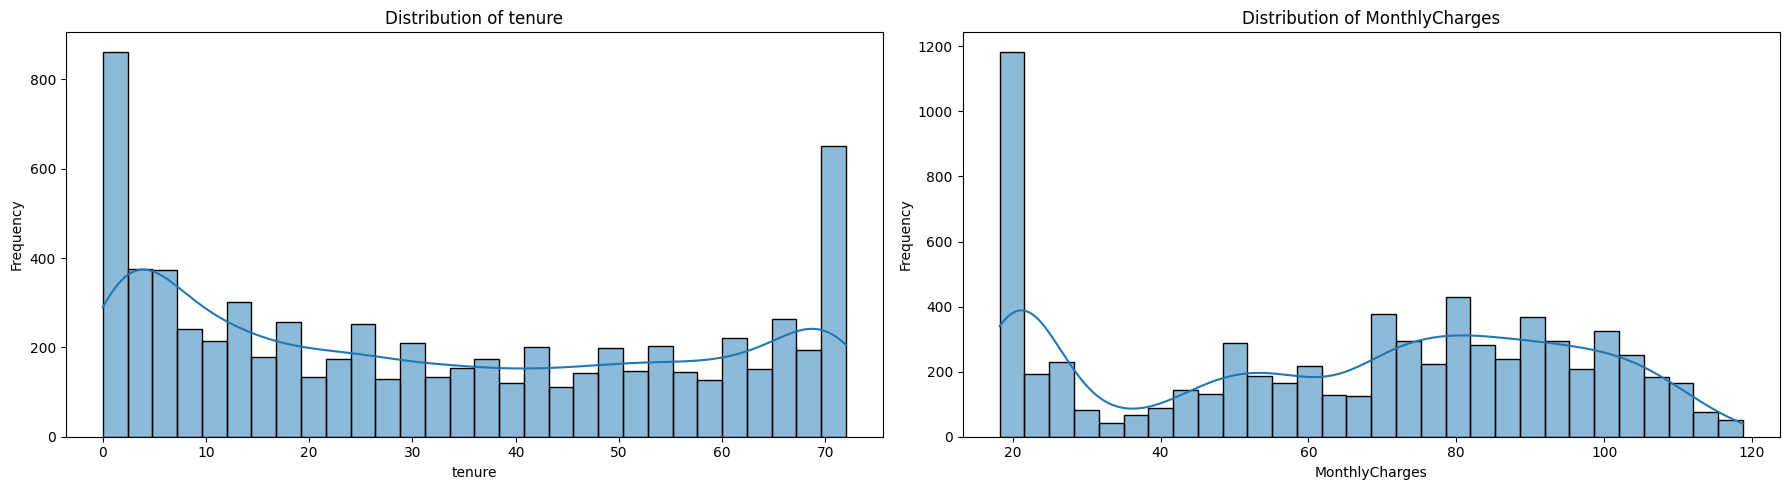

In [ ]:
# Histograms for numerical variables
numerical_cols = ['tenure', 'MonthlyCharges']
n_cols = 2
n_rows = (len(numerical_cols) - 1) // n_cols + 1

plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sb.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

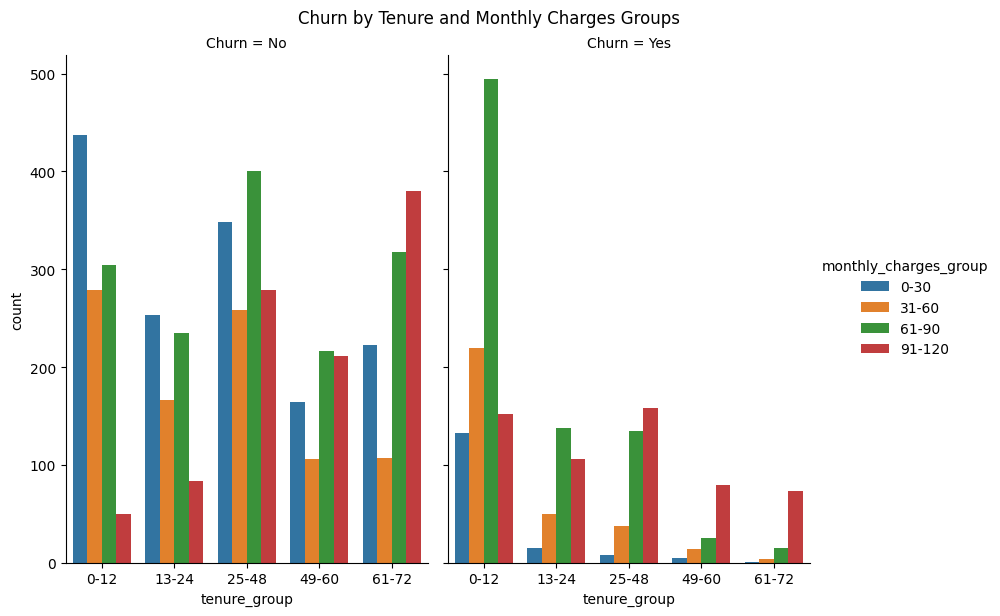

In [ ]:
# Bin tenure into categories
tenure_bins = [0, 12, 24, 48, 60, 72]
tenure_labels = ['0-12', '13-24', '25-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Bin MonthlyCharges into categories
monthly_charges_bins = [0, 30, 60, 90, 120]
monthly_charges_labels = ['0-30', '31-60', '61-90', '91-120']
df['monthly_charges_group'] = pd.cut(df['MonthlyCharges'], bins=monthly_charges_bins, labels=monthly_charges_labels, right=False)

# Create a grouped bar chart using catplot
sb.catplot(data=df, x='tenure_group', hue='monthly_charges_group', col='Churn', kind='count', height=6, aspect=.7)
plt.suptitle('Churn by Tenure and Monthly Charges Groups', y=1.02) # Add a suptitle
plt.show()

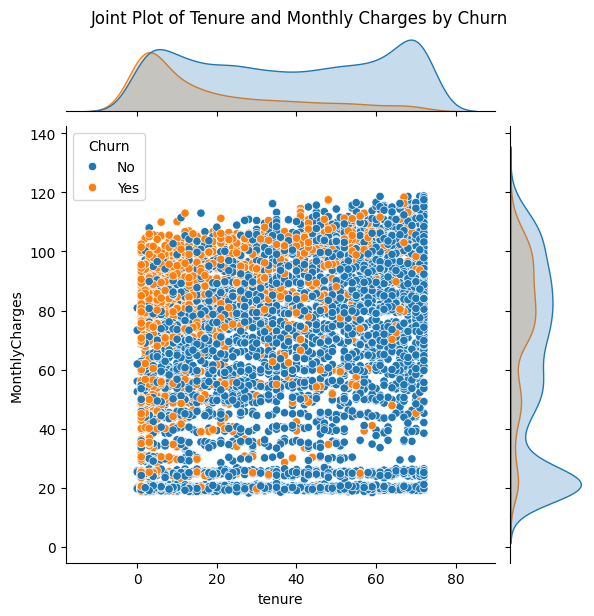

In [ ]:
sb.jointplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', kind='scatter')
plt.suptitle('Joint Plot of Tenure and Monthly Charges by Churn', y=1.02)
plt.show()

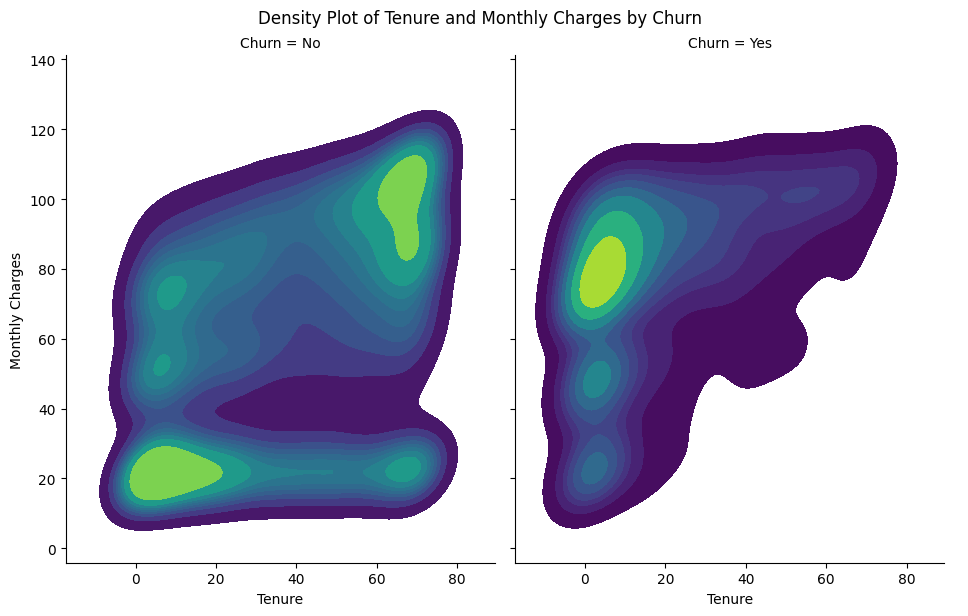

In [ ]:
# Contour/Density plots for tenure and MonthlyCharges by Churn
# This requires creating separate plots for each churn category

g = sb.FacetGrid(df, col='Churn', height=6, aspect=.8)
g.map_dataframe(sb.kdeplot, x='tenure', y='MonthlyCharges', fill=True, cmap='viridis') # Added cmap='viridis'
g.fig.suptitle('Density Plot of Tenure and Monthly Charges by Churn', y=1.02)
g.set_axis_labels('Tenure', 'Monthly Charges')
g.add_legend()
plt.show()

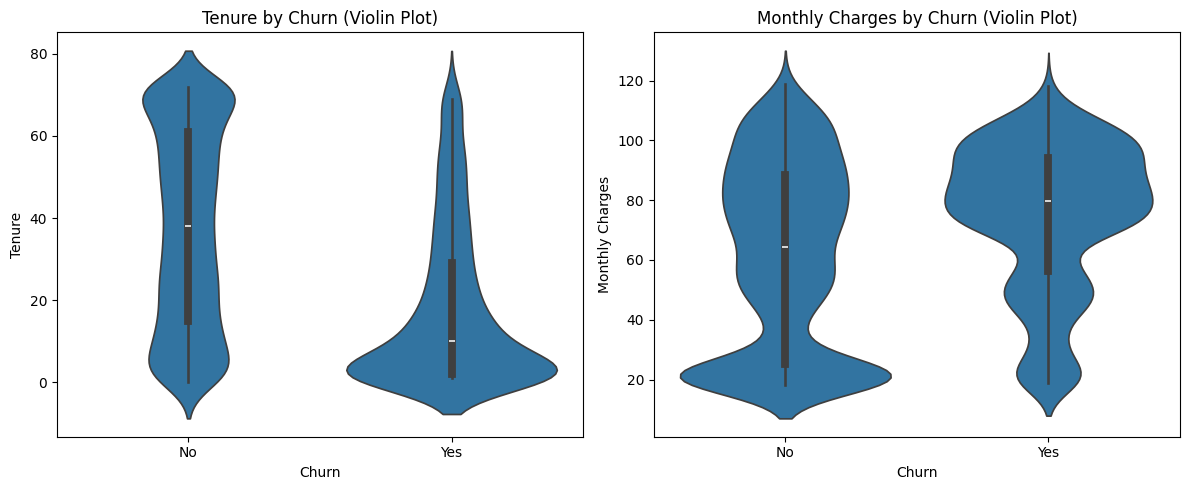

In [ ]:
# Violin plots for tenure and MonthlyCharges by Churn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sb.violinplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn (Violin Plot)')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn (Violin Plot)')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()